In [1]:
## Banning in League of Legends: Do it Matter?
## Eden Zheng, Tommy Nguyen

In [22]:
## Introduction 

## League of Legends (LoL) is a 3D, third person MOBA (Multiplayer Online 
## Battle Arena) game developed by Riot Games. Released in October 2009, 
## League recently has started it's first franchise year within North 
## America, and currently has over 81 million players daily thoughout the
## world. Within the franchise year, there are some notable names such as
## Golden Guardians (Golden State Warriors), 100Thieves (Chicago Bulls),
## and Echo Fox (Rich Fox). The premise of the game is simple: each games
## consists of two teams of 5 players, with one labeled as red, and one
## labeled as blue. Both team's primary objective is to destory the 
## opposing team's nexus, which is located at the opposite sides of the map.
## Within the game, there are other side objectives to accumulate gold or 
## experience to have an edge over the enemy team. Some of these side 
## objectives are dragon, baron nashor, turrents, and inhibators. There are
## more than the four noted, but the common thing they all share is a point
## of pressure to draw th enemy towards your team to start a teamfight.
## Each team is given 5 bans for over 140 champions to pick, and after the
## ban phase, each player is required to pick on of the remaining ~130 
## champions that form some team compositons. 'Full details' can be found
## here <insert link to League of Legends page>.

## A platform called Oracle's Elixir created by Tim "Magic" Sevenhuysen has
## collected multiple seasons worth of data for each professional match 
## that has occurred within the past couple years. Along with this data 
## release <insert link to Oracle's Elixir page>, he revealed that numerous
## coaches and analysts within the scene uses this data to gain a better 
## idea at what the strengths and weaknesses are for each team and player.
## Given the interesting statistics they were able to find, the Oracle's 
## Elixir decided to release the datasets as a way to allow members of the
## community to conduct anaylsis and start their esports career in some
## analyst or coaching positon.

## In this tutorial, our goal is to tidy the in-game data given to us, 
## provide valuable insight in determining if banning a champion matter in 
## overall team's chances of winning. Although there are numerous of 
## external factors that can't be quantify such as team compositon, 
## type of day, comfort on the champion, and patch effect on champions, 
## we can ignore these external factors. For readers unfamiliar with this 
## game, we hope this analysis will make them interested in trying out 
## League of Legends and provide some evidence on some go-to bans.
## For experienced players, we hope to show interesting unknown statistics
## and maybe even give new insights on reasoning behind bans.

## Banning champions is done before the game begins with each given 5 
## bans to remove certain champions from the game, that they percieved 
## as OP (overpowered), unfair to play against, or give themselves an 
## advantage for the match.

In [23]:
## Part 1: Data Preparation and Getting Started

## We will make use of Python 3 along with a few imported libraries: pandas,
## numpy, matplotlib, scikit-learn, seaborn, and more. <insert link for 
## the libraries> 

# Necessary libraries and imports to complete this tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## The dataset we will be using can be found at the bottom of the data 
## release <insert link to Oracle's Elixir page> mentioned earlier. The
## dataset comes in the form of a CSV (Comma Separated Value) file.

In [24]:
## Part 1.1: Preprocssing the Data

## Before running the code to read the League of Legends file, we have to
## preprocess the data using Excel and any text editor. The League of 
## Legends data was huge, so to have a more manageably sized data frame we
## grabbed approximately both the EULCS and NALCS. Additionally, I have 
## already scrap the dataset to only the NALCS (North American League 
## Championship Series), and EULCS (European League Championship Series)

league = pd.read_csv("LoL.csv", sep=',', usecols=range(0,15))
league = league.dropna()
league

,league,split,date,week,game,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5
0,EULCS,2018-2,43274.49209,2,2,Blue,Top,Wunder,G2 Esports,Aatrox,Ryze,Zilean,Camille,Fiddlesticks,Rakan
1,EULCS,2018-2,43274.49209,2,2,Blue,Jungle,Jankos,G2 Esports,Braum,Ryze,Zilean,Camille,Fiddlesticks,Rakan
2,EULCS,2018-2,43274.49209,2,2,Blue,Middle,Perkz,G2 Esports,Lucian,Ryze,Zilean,Camille,Fiddlesticks,Rakan
3,EULCS,2018-2,43274.49209,2,2,Blue,ADC,Hjarnan,G2 Esports,Karma,Ryze,Zilean,Camille,Fiddlesticks,Rakan
4,EULCS,2018-2,43274.49209,2,2,Blue,Support,Wadid,G2 Esports,Alistar,Ryze,Zilean,Camille,Fiddlesticks,Rakan
5,EULCS,2018-2,43274.49209,2,2,Red,Top,Smittyj,H2K,Jax,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
6,EULCS,2018-2,43274.49209,2,2,Red,Jungle,Shook,H2K,Lee Sin,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
7,EULCS,2018-2,43274.49209,2,2,Red,Middle,Selfie,H2K,Vladimir,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
8,EULCS,2018-2,43274.49209,2,2,Red,ADC,Sheriff,H2K,Kai'Sa,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
9,EULCS,2018-2,43274.49209,2,2,Red,Support,promisq,H2K,Morgana,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe


In [25]:
## In the above League of Legends dataset, there are 11 columns. We have:
    ## League (NALCS or EULCS)
    ## Week (what week the game was played)
    ## Side to the Game
    ## Game Number (each team plays the other teams twice per split)
    ## Team 
    ## Position (What Champion got picked and where it went)
    ## Champion (What Champion was picked)
    ## Ban[1-5] (Ban Number and what got banned)
    ## Result
## The titles of each column should be self-explanatory. If you'd like to 
## learn more about a column in the context of the game, important topics
## have links to the addition information here <insert Oracle's Elixir Data
## Dictionary here>.

league.head()

,league,split,date,week,game,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5
0,EULCS,2018-2,43274.49209,2,2,Blue,Top,Wunder,G2 Esports,Aatrox,Ryze,Zilean,Camille,Fiddlesticks,Rakan
1,EULCS,2018-2,43274.49209,2,2,Blue,Jungle,Jankos,G2 Esports,Braum,Ryze,Zilean,Camille,Fiddlesticks,Rakan
2,EULCS,2018-2,43274.49209,2,2,Blue,Middle,Perkz,G2 Esports,Lucian,Ryze,Zilean,Camille,Fiddlesticks,Rakan
3,EULCS,2018-2,43274.49209,2,2,Blue,ADC,Hjarnan,G2 Esports,Karma,Ryze,Zilean,Camille,Fiddlesticks,Rakan
4,EULCS,2018-2,43274.49209,2,2,Blue,Support,Wadid,G2 Esports,Alistar,Ryze,Zilean,Camille,Fiddlesticks,Rakan


In [26]:
## Part 1.2 Tidying and Modifing the Data

## As we mentioned already we're primarily look at the NALCS, and EULCS, 
## summer split, and the entire split. 

## In addition, we will remove the split column as we're only looking at
## once split worth of data

## Then we're going to collapse the rows in the dataframe, grouping data 
## by 'team' and 'week'

# Using NALCS/EULCS then deleting various other unneeded rows as stated 
# above.

league.drop(['split'], axis=1, inplace=True)
league

,league,date,week,game,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5
0,EULCS,43274.49209,2,2,Blue,Top,Wunder,G2 Esports,Aatrox,Ryze,Zilean,Camille,Fiddlesticks,Rakan
1,EULCS,43274.49209,2,2,Blue,Jungle,Jankos,G2 Esports,Braum,Ryze,Zilean,Camille,Fiddlesticks,Rakan
2,EULCS,43274.49209,2,2,Blue,Middle,Perkz,G2 Esports,Lucian,Ryze,Zilean,Camille,Fiddlesticks,Rakan
3,EULCS,43274.49209,2,2,Blue,ADC,Hjarnan,G2 Esports,Karma,Ryze,Zilean,Camille,Fiddlesticks,Rakan
4,EULCS,43274.49209,2,2,Blue,Support,Wadid,G2 Esports,Alistar,Ryze,Zilean,Camille,Fiddlesticks,Rakan
5,EULCS,43274.49209,2,2,Red,Top,Smittyj,H2K,Jax,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
6,EULCS,43274.49209,2,2,Red,Jungle,Shook,H2K,Lee Sin,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
7,EULCS,43274.49209,2,2,Red,Middle,Selfie,H2K,Vladimir,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
8,EULCS,43274.49209,2,2,Red,ADC,Sheriff,H2K,Kai'Sa,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe
9,EULCS,43274.49209,2,2,Red,Support,promisq,H2K,Morgana,Heimerdinger,Taliyah,Nocturne,Irelia,Zoe


In [27]:
## Part 2: Exploratory Data Analysis 

## For this section, there's not enough distinct, default colors for the
## graphs we will use.  Thankfully, seaborn allows us to create a new 
## palette of colors to use for graphing. Below is a set of distinct 
## colors, and of course you can change whatever colors you like.

colors = ["purple", "green", "blue", "pink", "brown", "red", "teal", "orange", "yellow", "grey", \
          "cyan", "bright green", "hot pink", "black", "maroon", "tan", "lavender", "goldenrod", "sky blue", "olive"]
new_palette = sns.xkcd_palette(colors)

In [35]:
## If Zoe is banned, is her team more or less likely to win (or neither)?

## For starters, we'll ask a simple question. If the champion Zoe is 
## banned, does this make her team more likely to win? Does it make a
## difference? First, we need to extract matches in which Zoe is banned.
## Let's keep blue and red bans separate for now, since this might make 
## answering the question easier later.

## First, we'll get the matches which the blue team banned Zoe
blueban =  league[(league.side == "Blue") & (league.position == "Team")]
bluezoeban = blueban[((league.ban1 == "Zoe") | (league.ban2 == "Zoe") | (league.ban3 == "Zoe") | (league.ban4 == "Zoe") | (league.ban5 == "Zoe"))]
bluezoeban

0.1947069943289225

In [42]:
print ("Zoe was banned " + str(len(bluezoeban)) +  " times out of " + str(len(blueban)) + " Blue side games (" + str(len(bluezoeban)*100/len(blueban)) + "%)")

Zoe was banned 103 times out of 529 Blue side games (19.47069943289225%)


In [19]:
## And we'll do the same for the red team
redban =  league[(league.side == "Red") & (league.position == "Team")]
redzoeban = redban[((league.ban1 == "Zoe") | (league.ban2 == "Zoe") | (league.ban3 == "Zoe") | (league.ban4 == "Zoe") | (league.ban5 == "Zoe"))]
redzoeban

NameError: name 'Red' is not defined

In [43]:
print ("Zoe was banned " + str(len(redzoeban)) +  " times out of " + str(len(redban)) + " Blue side games (" + str(len(redzoeban)*100/len(redban)) + "%)")

NameError: name 'redzoeban' is not defined

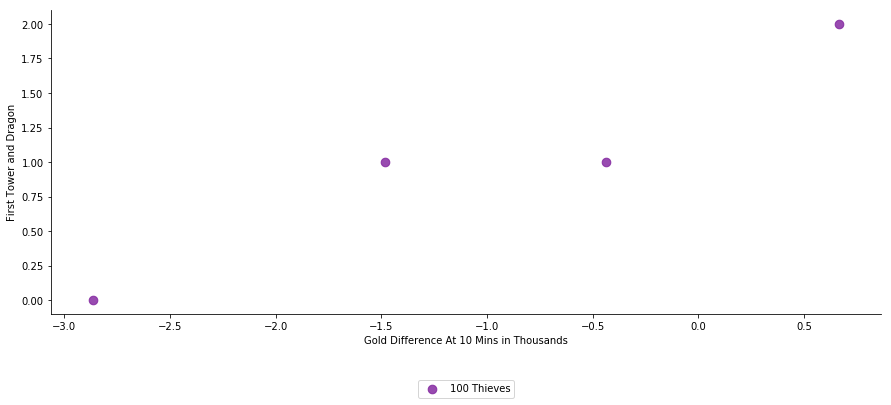

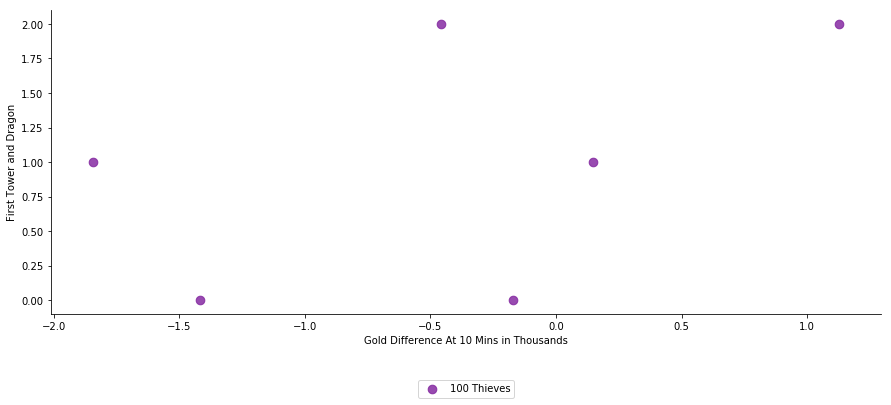

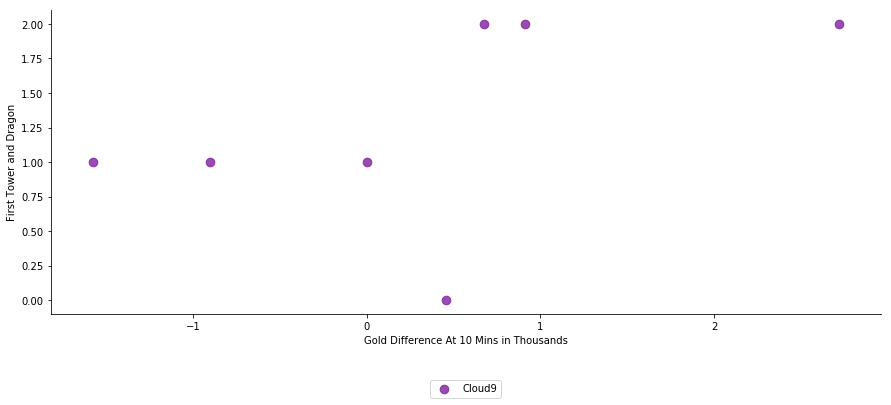

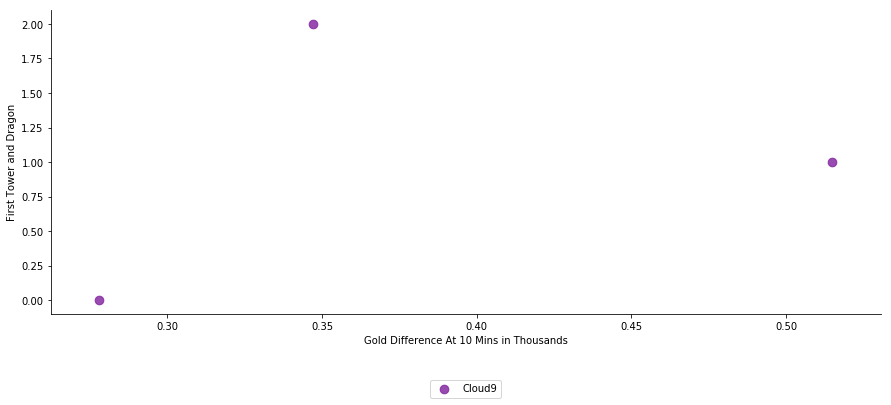

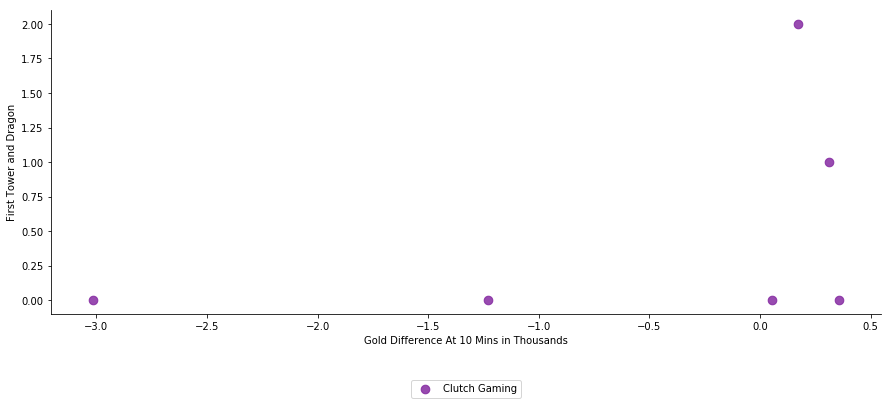

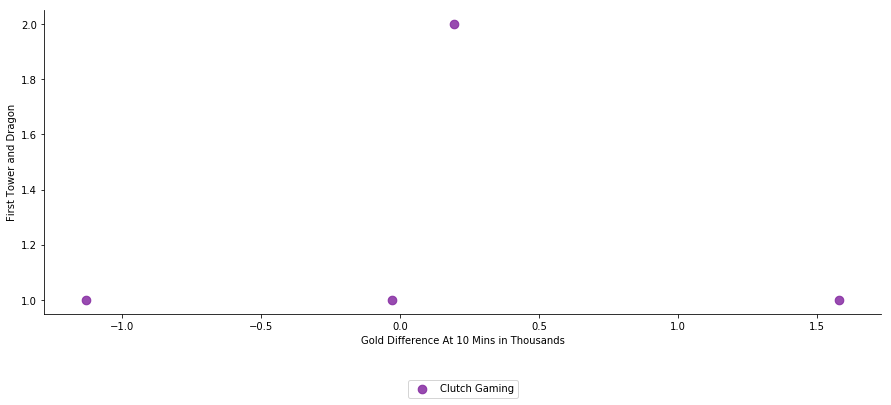

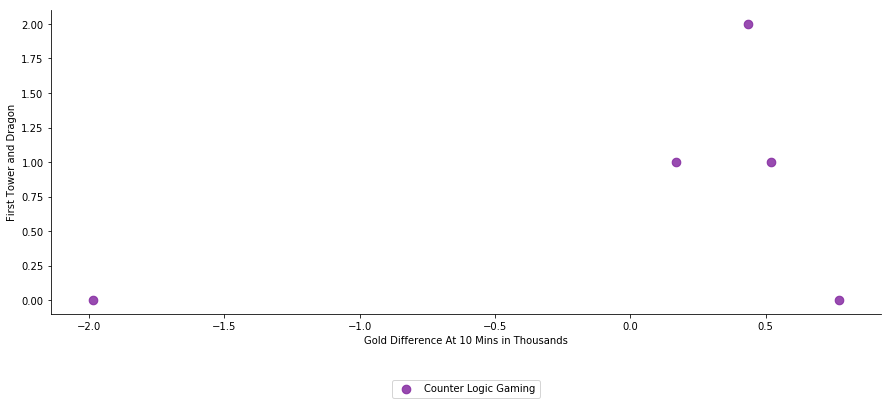

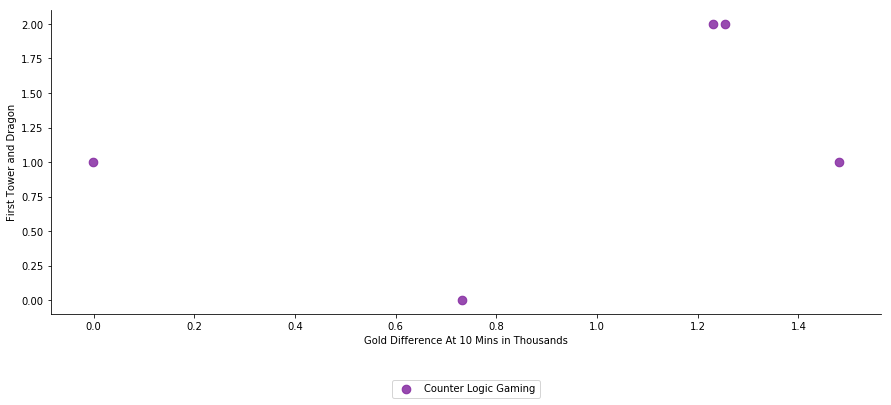

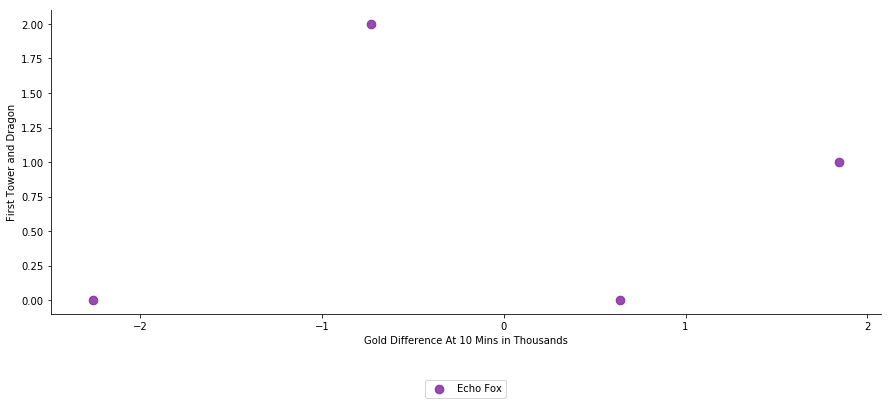

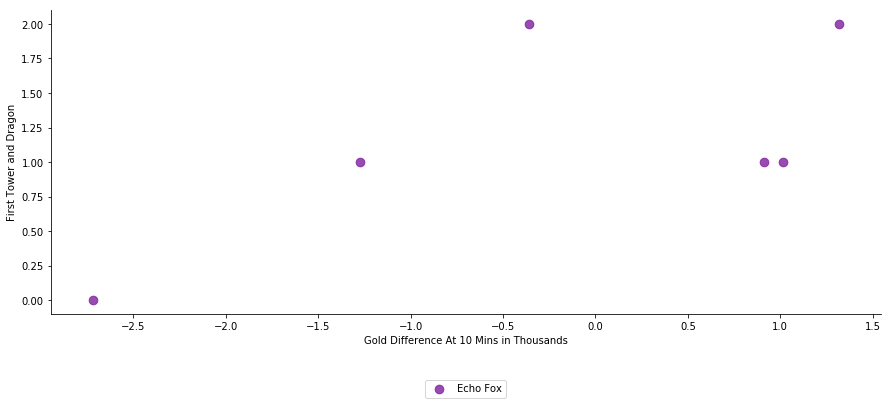

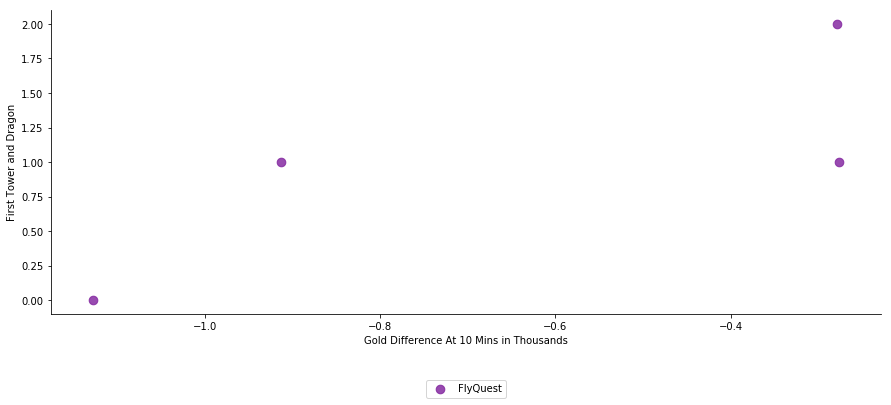

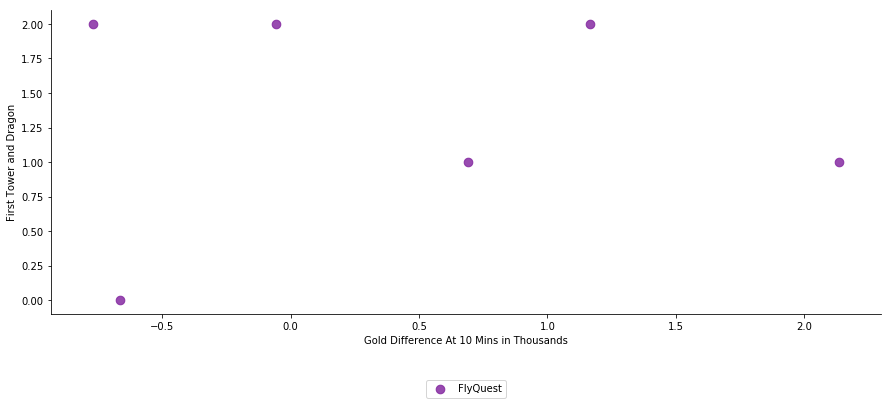

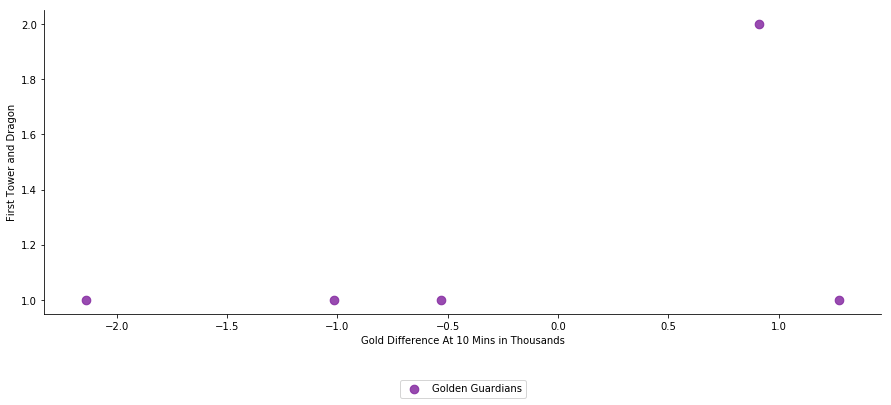

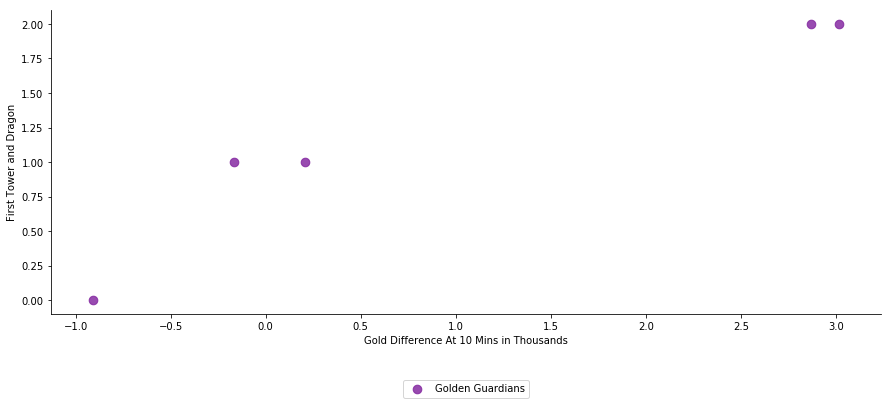

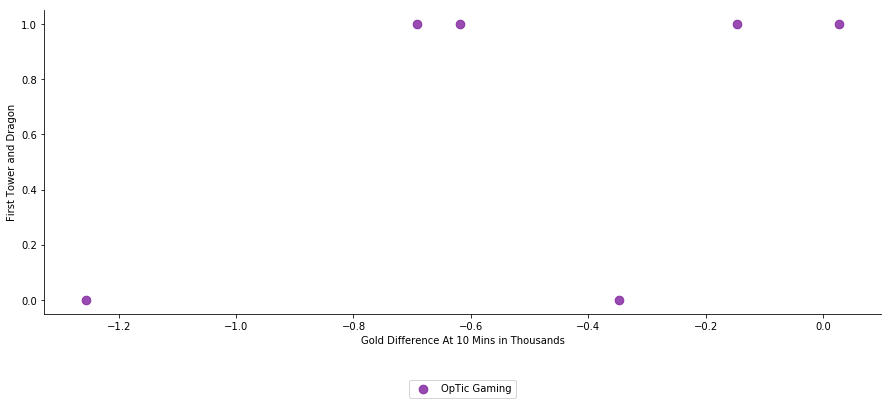

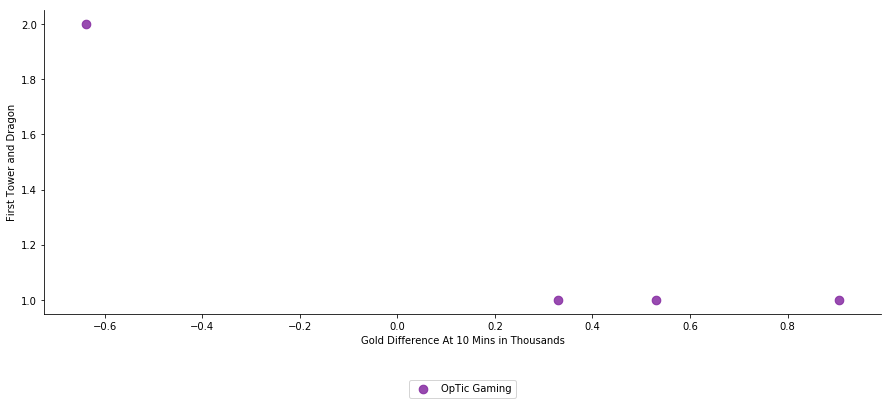

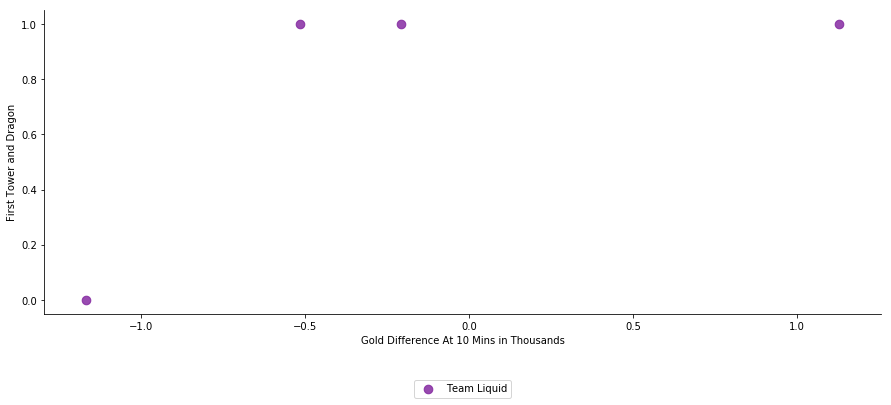

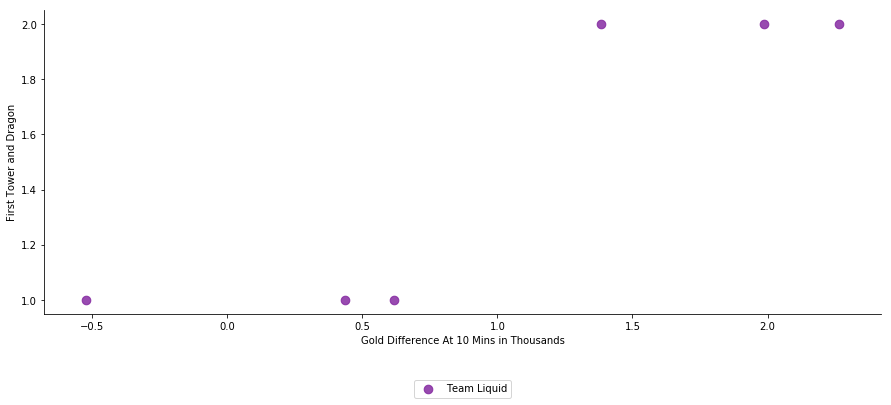

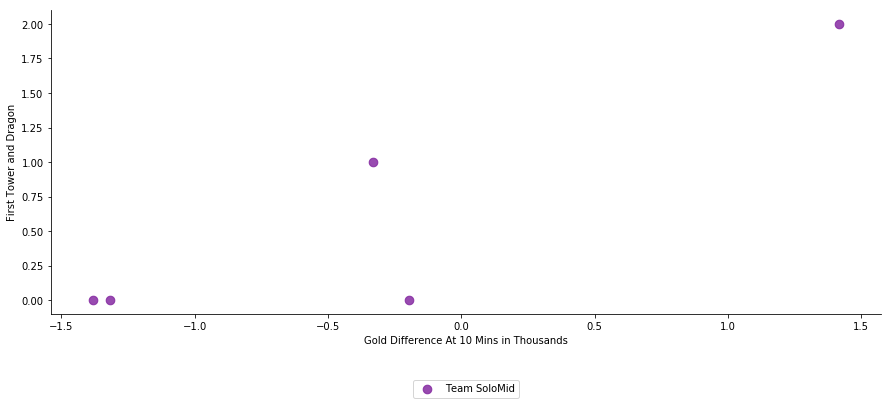

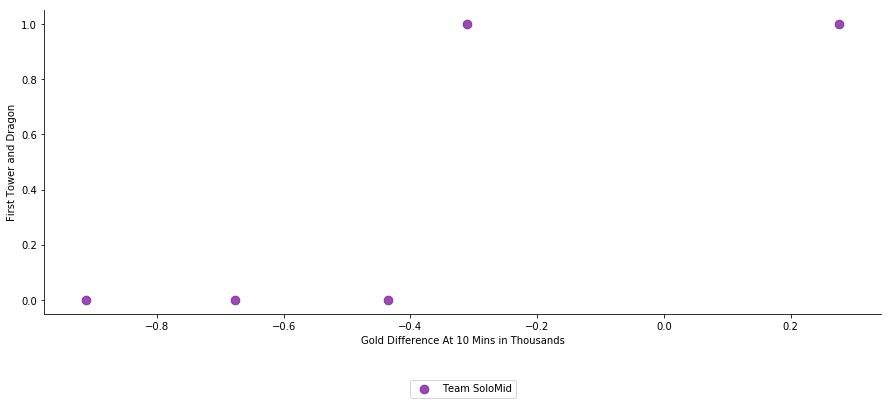

In [52]:
## Now we want all the matches where Zoe was banned by at least one team,
## then we could get it with:
redban + blueban

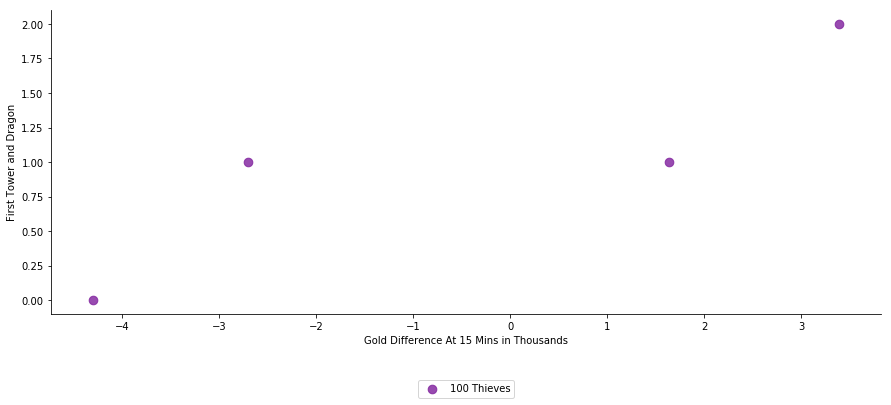

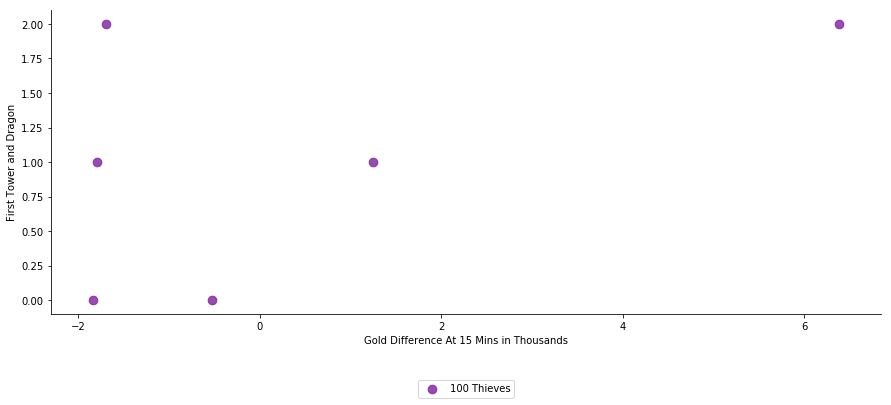

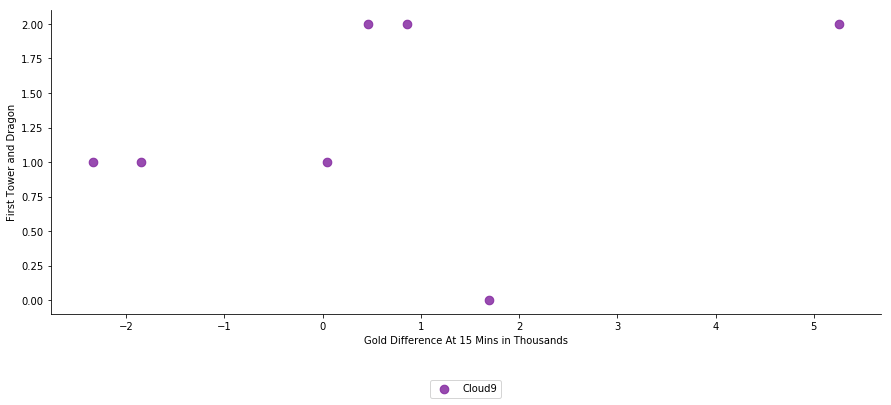

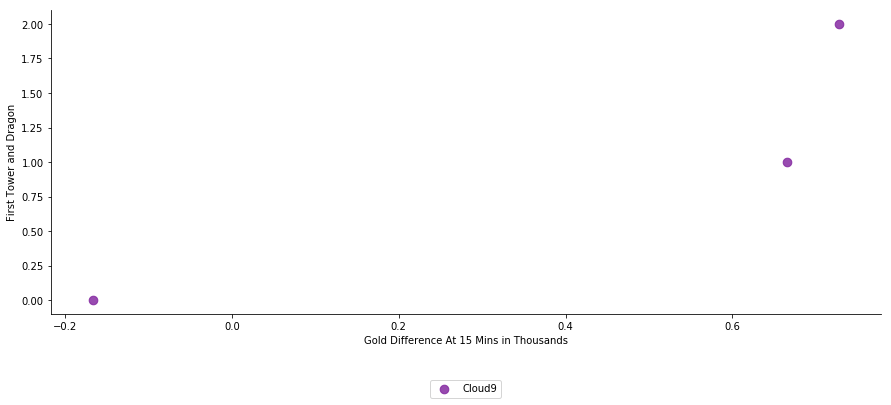

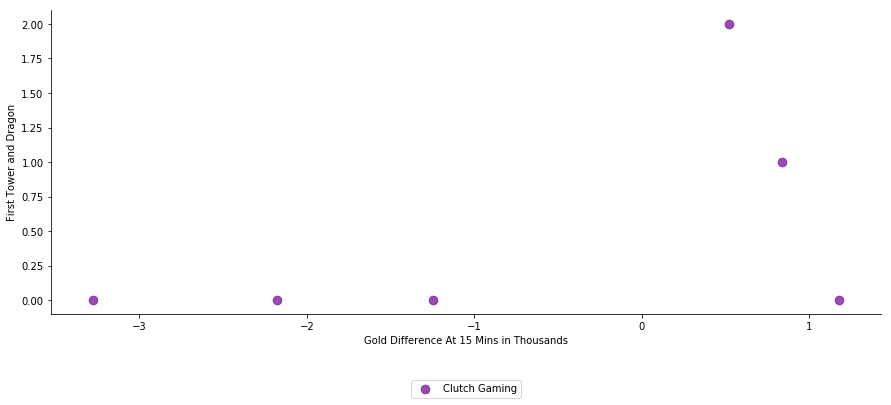

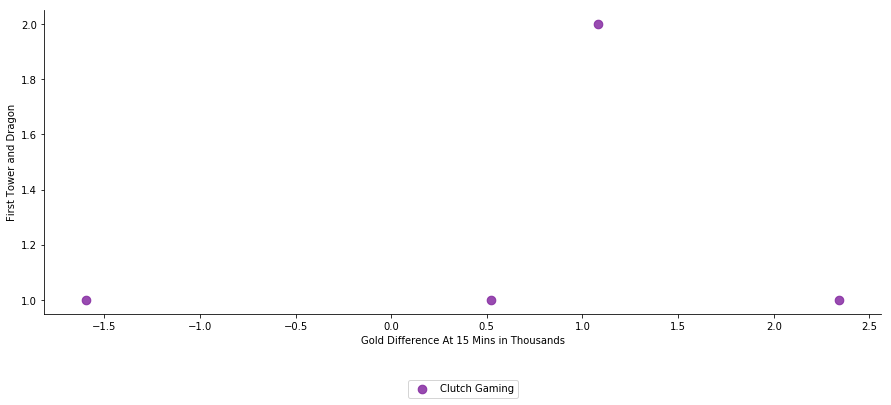

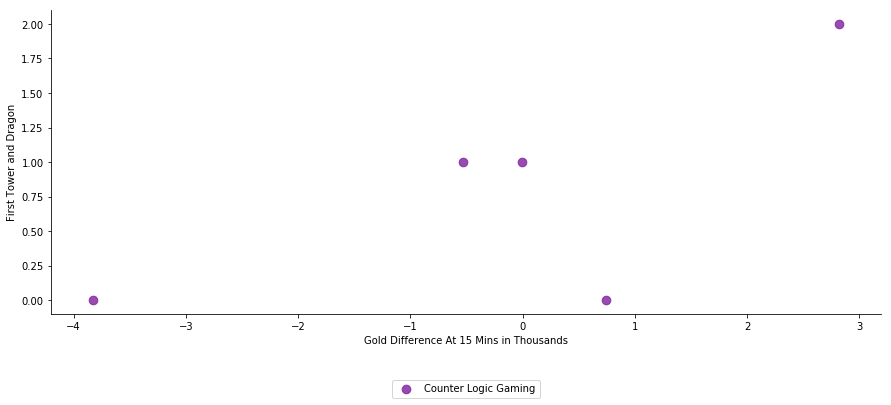

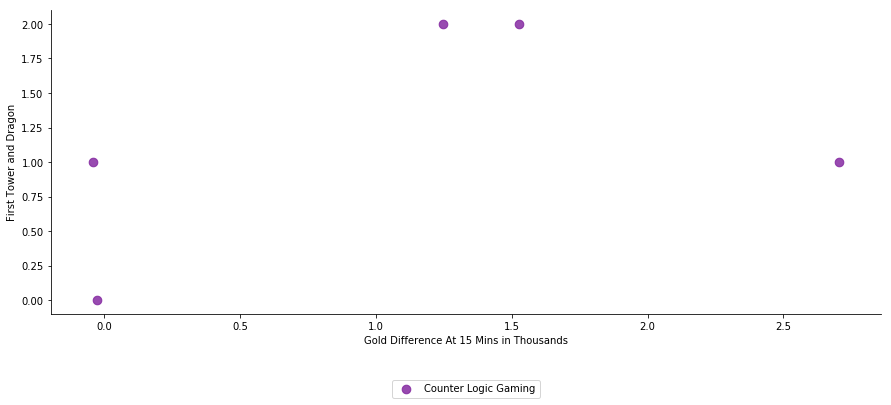

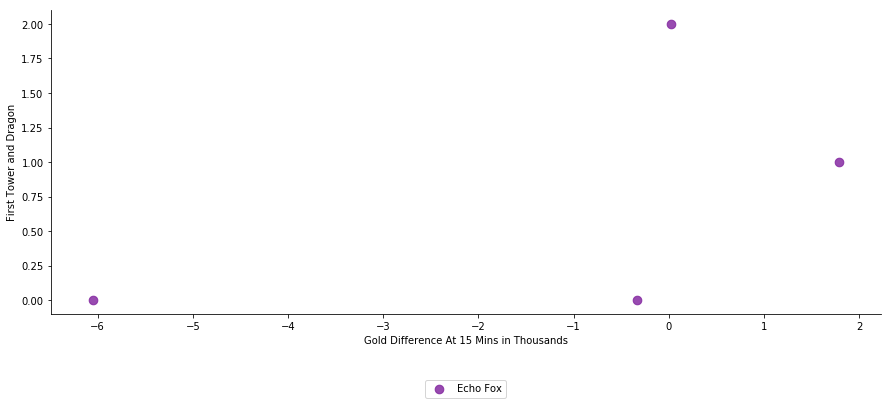

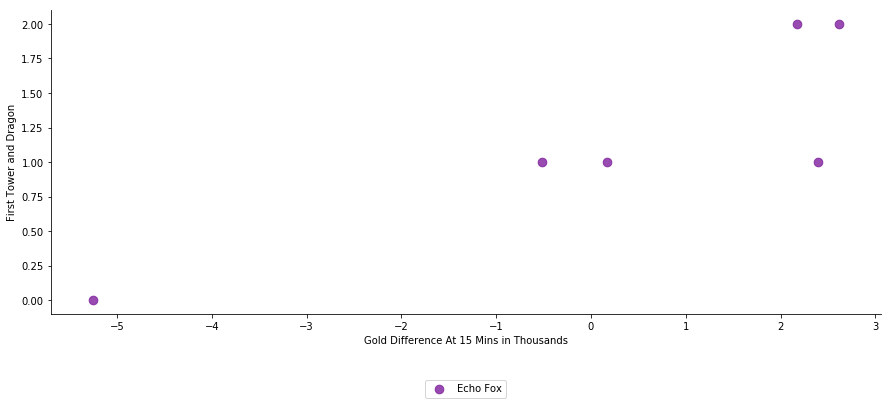

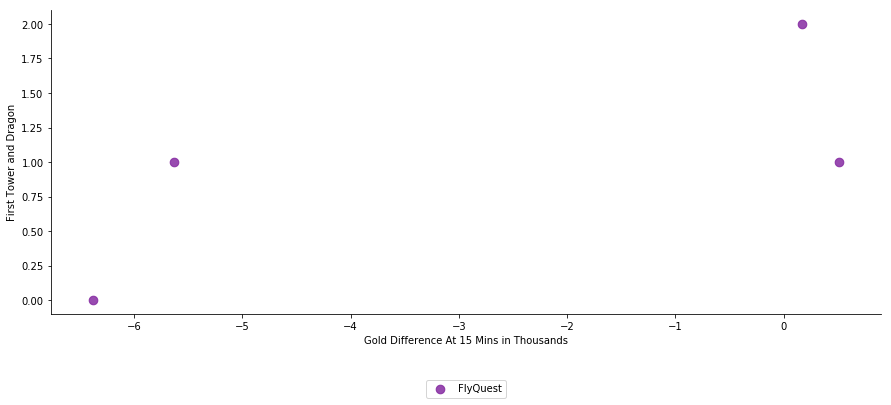

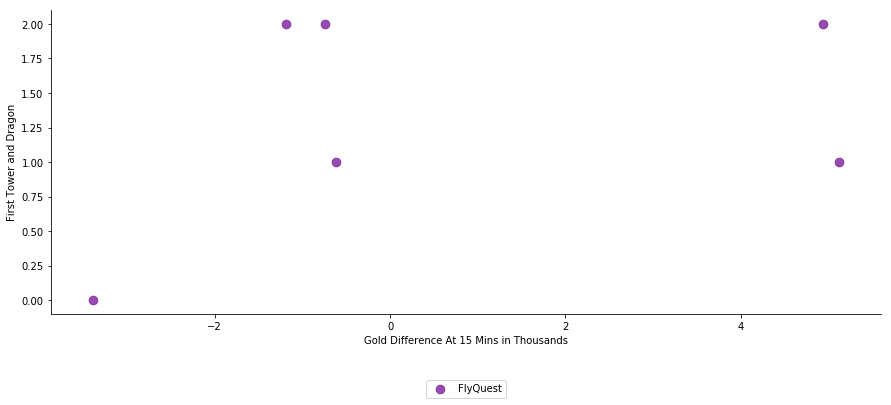

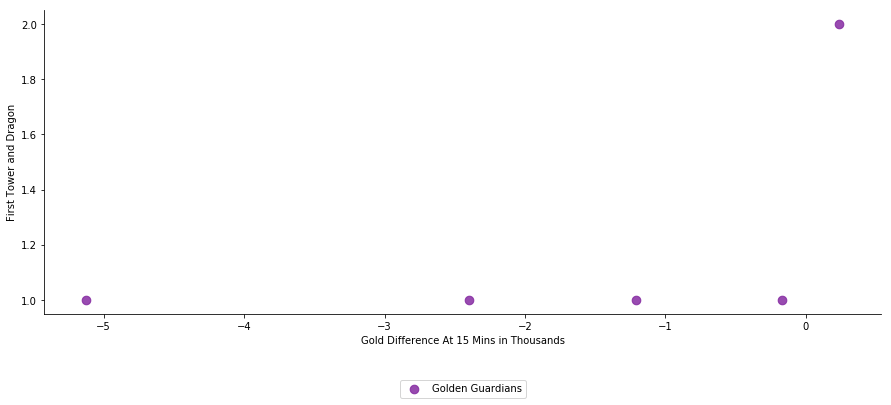

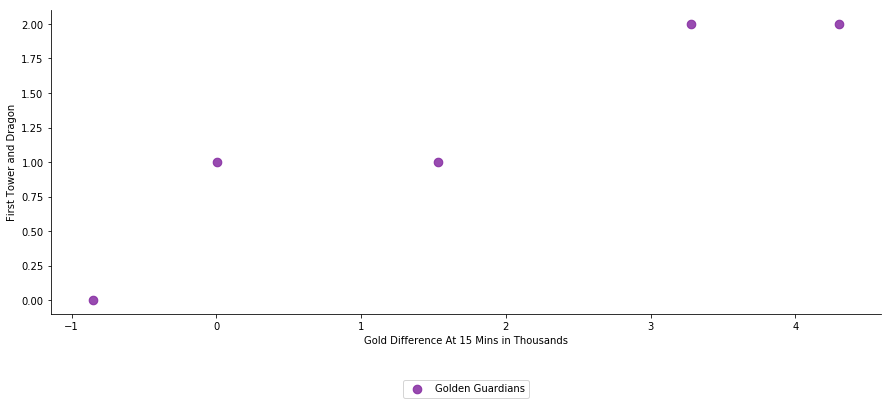

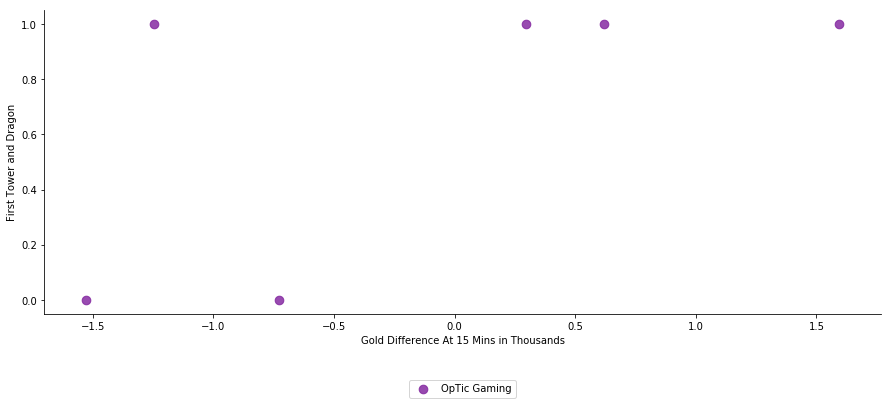

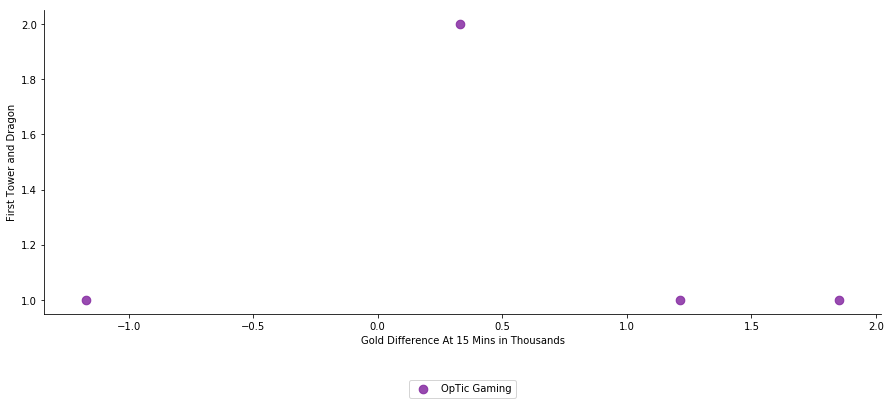

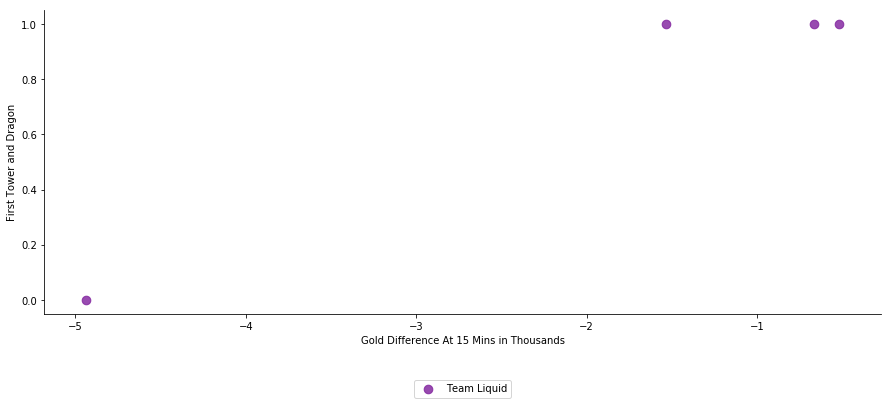

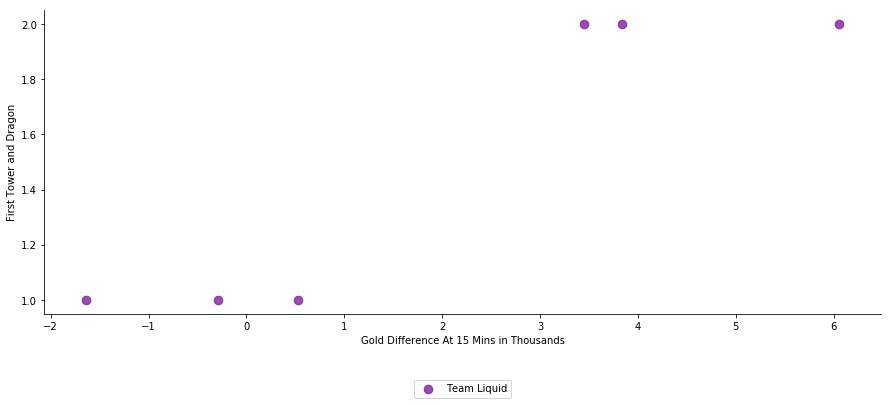

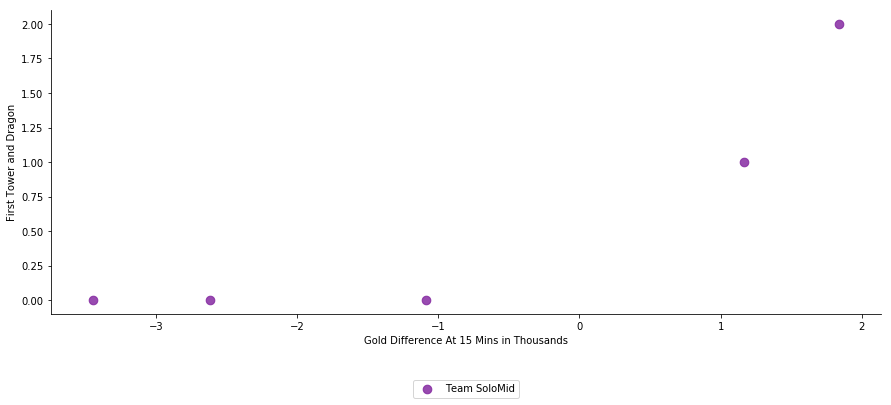

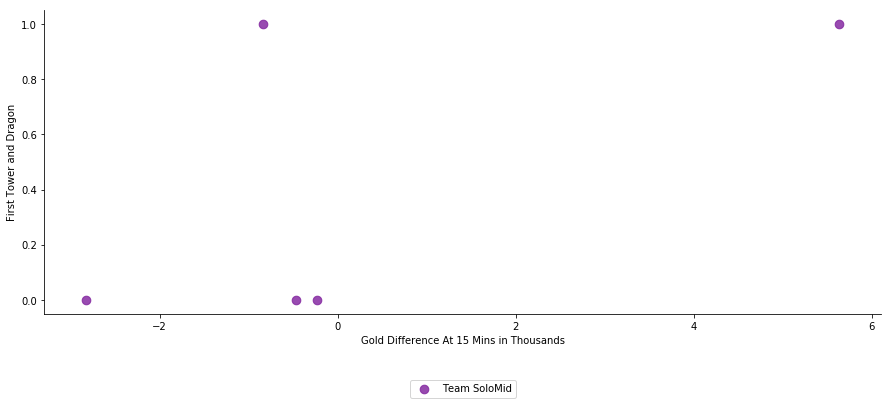

In [53]:
## And if we wanted all the matches where Zoe was banned by both teams,
## we can do an intersection of the two
redban & blueban

In [60]:
## The result should be to be expected because both teams cannot ever both
## ban the same champions especially in competitive. This is a nice check
## though.

## For red team bans, how many of those matches did the red team lose?
league = pd.read_csv("LoL.csv", sep=',', usecols=range(0,15))
league_groups = league.groupby(['Side'], as_index=False)
blueSide = league_groups.get_group('Blue')

## This would give us a dataframe of all the matches that the blue team 
## won among those where the red team banned Zoe
redban_blue_wins = redban.loc[redban['Result'] == '0']
redban_blue_wins.head()

In [56]:
# Does red team win more than they lost? Here are the matches red team won:
len(redban - redban_blue_wins)

SyntaxError: invalid syntax (<ipython-input-56-d25d19acdbfc>, line 9)

In [57]:
## here are the number of matches red team lost:
len(redban_blue_wins)

In [58]:
## What do we get for the case where blue team bans Zoe? 

## We'll do the same thing for matches in which the blue team banned Zoe?
league = pd.read_csv("LoL.csv", sep=',', usecols=range(0,15))
blueban = league[(league.side == Blue) & ((league.ban1 == Zoe) | 
                                          (league.ban2 == Zoe) | 
                                          (league.ban3 == Zoe) | 
                                          (league.ban4 == Zoe) | 
                                          (league.ban5 == Zoe))]

league_groups = league.groupby(['Side'], as_index=False)
redSide = league_groups.get_group('Red')

## This would give us a dataframe of all the matches that the red team 
## won among those where the blue team banned Zoe
blueban_red_wins = blueban.loc[blueban['Result'] == '0']
blueban_red_wins.head()

In [59]:
# Does blue team win more than they lost? Here are the matches blue team 
## won:
len(blueban - blueban_red_wins)

In [61]:
## here are the number of matches blue team lost:
len(blueban_red_wins)

NameError: name 'blueban_red_wins' is not defined

In [2]:
## Who is the most banned character? Does banning this character make 
## your team more likely to win?¶

## We want to take the task some conventional wisdom that may be floating
## around the community about which characters you should ban if you want 
## to increase your chances to win. Let's see if this holds water.

## First we need to find the most banned character. Probably lots of ways
## to get at this, but one thign we can do is a groupy by each ban slot as
## before, for each building a dictionary giving banned champions as keys
## and the number of matches they were banned in as values:

counts = pd.DataFrame({ban: {key: len(value) for key, value in league.categories.groupby(ban).items()} for ban in ('Ban1', 'Ban2', 'Ban3', 'Ban4', 'Ban5')})
counts.head()

NameError: name 'pd' is not defined

In [1]:
## We can then sum across columns and sort to get a ranking of banned
## champions across this most recent split:
counts.sum(axis=1).sort_values(ascending=False)

NameError: name 'counts' is not defined

In [64]:
## So we have our answer. The most banned champion across the NALCS/EULCS
## is _____.

## Out of curiosity, what's the distribution of bans look like acrosss
## champions?

%matplotlib inline
counts.sum(axis=1).sort_values(ascending=False).plot()

In [65]:
## Does banning ____ make you more likely to win?

## We'll do the same anaylsis we did for Zoe, but now for ____,
## And we'll do the same for the red team
redban = league[(league.side == Red) & ((league.ban1 == ___) | 
                                        (league.ban2 == ___) | 
                                        (league.ban3 == ___) | 
                                        (league.ban4 == ___) | 
                                        (league.ban5 == ___))]
len(redban)

NameError: name 'Red' is not defined

In [66]:
blueban = league[(league.side == Blue) & ((league.ban1 == ___) | 
                                        (league.ban2 == ___) | 
                                        (league.ban3 == ___) | 
                                        (league.ban4 == ___) | 
                                        (league.ban5 == ___))]
len(blueban)

NameError: name 'Blue' is not defined

In [67]:
## For red team bans, how many of those matches did the red team lose?

## Did red team win more often than they lost? Here are the matches red 
## team won
len(redban.loc[redban['Result'] == '1'])

NameError: name 'redban' is not defined

In [69]:
## Here are the number of matches red team lost? 
len(redban.loc[redban['Result'] == '0'])

NameError: name 'redban' is not defined

In [70]:
## What do we get for the case where blue team bans ____?

## Did blue team win more often than they lost? Here are the match blue won?
len(blueban.loc[blueban['Result'] == '1'])

NameError: name 'blueban' is not defined

In [71]:
## Here are the number of matches blue lost:
len(blueban.loc[blueban['Result'] == '0'])

NameError: name 'blueban' is not defined

In [72]:
## Hmmm...maybe not a signal here...might not be much point overall to 
## banning __. However, it may be the case that if you ban __ and perhaps 
## another character this improves your chances? That's an interesting 
## question for another time. Could it also be the case that banning 
## ___ levels the playing field?

In [74]:
## In a game where ___ wasn't banned, was he picked? Was the team more 
## likely win?

## We already know that banning ____ doesn't seem to make your team more
## likely to win, but does not banning him or her make a team with ___
## more likely to win? Is he even picked by players?

## First we need matches where ___ was not banned. We'll iterate through 
## all the ban slows, grab out the matches where the banned champion is __,
## then combine these into a single one. We can then subtract it from all
## the matches to get only those matches where ___ was not banned:
match_banned = league[(league.ban1 == Zoe) | (league.ban2 == Zoe) 
                                | (league.ban3 == Zoe) 
                                | (league.ban4 == Zoe) 
                                | (league.ban5 == Zoe)]
___not_banned = league - match_banned
len(___not_banned)

AttributeError: 'DataFrame' object has no attribute 'ban1'

In [ ]:
## This would give you the matches that ___ wasn't banned and was picked
matches_picked = ___not_banned[(___not_banned.champion == '')]

In [75]:
## Number of wins
matches_won = matches_picked[(matches_picked.result == '1')]
len(matches_won)

NameError: name 'matches_picked' is not defined

In [76]:
## Number of losts
matches_lost = matches_picked[(matches_picked.result == '0')]
len(matches_lost)

NameError: name 'matches_picked' is not defined

In [77]:
## Doesn't really look like he or she confers too much of an advantage, but
## perhaps a slight one?

In [ ]:
## Other questions we can ask...

## There are tons of questions we can ask, and even complex ones are 
## surprisingly easy to do so given the way we've structured our data, 
## Here's a smattering:
    ## 1: Is there any champion that seems to confer a systematic advantage
    ## to the team that has it? If it appears so, can we isolate the 
    ## effect from other possible factors?
    
    ## 2: Is there any combination of champion bans that make a team more 
    ## likely to win? Does it depend heavily on the team?
    
    ## 3: Which teams ban the same champions the most? Can we guess why 
    ## from the data?